In [128]:
# Import Libraries
import keras
import numpy as np
import matplotlib.pyplot as plt


In [129]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_labels.shape)


(60000,)


In [130]:
# Class names are not included
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [131]:
# Training Data
train_images.shape

(60000, 28, 28)

There are 60,000 images, each images is a 28 x 28 numpy array consisting of pixel values from 0 to 255.

In [132]:
# Pixel Values fall between 0 to 255, We need to scale them between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

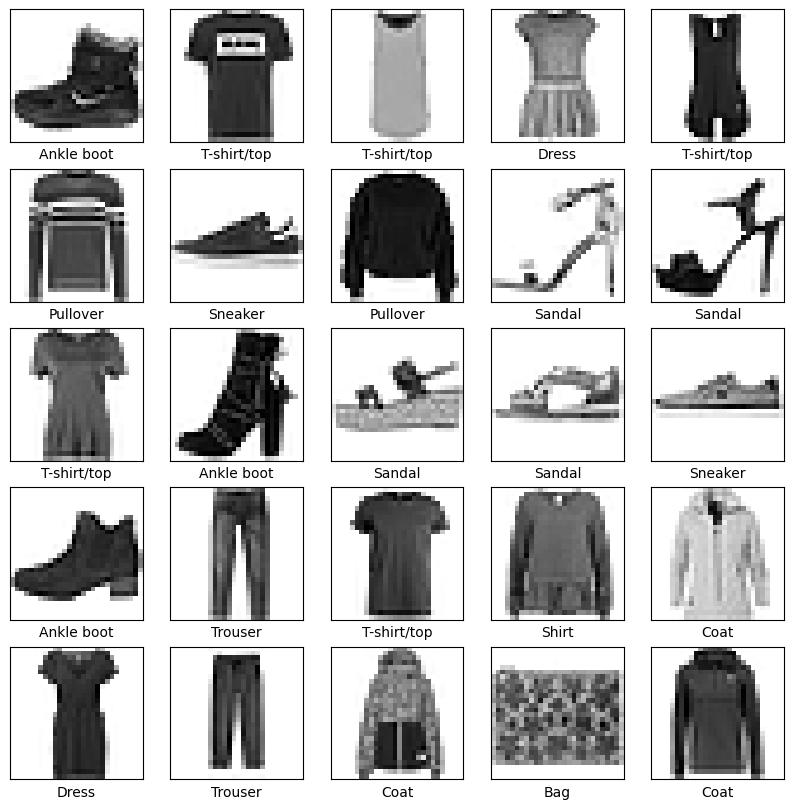

In [150]:
# Verify data is in correct format
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

To build the model, we first configure the layers of the model and then compile the model.

In [134]:
# Set up Layers
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])
model.summary()
# Flatten transforms two 2D images array into 1D
# Dense layers are fully connected neural layers.

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
# Compile the model
model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])



the optimizer parameter determines the optimization algorithm used to update the model's weights, the loss parameter defines the loss function to measure the model's performance during training, and the metrics parameter specifies the evaluation metric(s) to monitor the model's performance during training and testing.

```optimizer='adam'```: This parameter specifies the optimization algorithm used during training. In this case, the Adam optimizer is used. Adam stands for Adaptive Moment Estimation and is a popular optimization algorithm that adjusts the learning rate adaptively based on the gradient.

```loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)```: This parameter defines the loss function used to measure the difference between the predicted output and the true labels during training. SparseCategoricalCrossentropy is a loss function commonly used for multi-class classification tasks. It computes the cross-entropy loss between the predicted probabilities (after applying a softmax activation function) and the true class labels. The from_logits=True argument indicates that the model's output is not directly normalized probabilities, but logits (raw output) that need to be converted into probabilities using a softmax activation function before computing the loss.

```metrics=['accuracy']```: This parameter specifies the evaluation metric(s) used to monitor the model's performance during training and testing. In this case, the accuracy metric is used. Accuracy measures the percentage of correctly predicted labels compared to the true labels. It is a commonly used metric for classification tasks.

##### Logits are the raw output of the model before applying any activation function. They represent the unnormalized predictions for each class. The values of the logits can be positive, negative, or zero. The magnitude of the logits doesn't necessarily correspond to the probability or confidence of a particular class. </br> Setting from_logits=True in the loss function indicates that the model's output has not undergone a softmax activation, which would convert the logits into normalized probabilities across all classes. Instead, the model's logits are treated as raw predictions and are directly used in the loss calculation

In [136]:
# Train the model
model.fit(train_images, train_labels, epochs = 10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.5007 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.3723 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.3328 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.3089 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.2924 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 1s 640us/step - loss: 0.2795 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.2635 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.2546 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.2463 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 1s 638u

In [143]:
# Test the accuracy on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n Test accuracy = ", test_acc*100)
print("\n Test loss = ", test_loss)

313/313 - 0s - loss: 0.3672 - accuracy: 0.8660 - 127ms/epoch - 405us/step

 Test accuracy =  86.59999966621399

 Test loss =  0.3672327995300293


Model is now trained, let's try making prediction on images

In [138]:
# Convert logits to probability values using softmax
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [139]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 335us/step


In [140]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

Model has made its predictions, let us visualize its predictions.

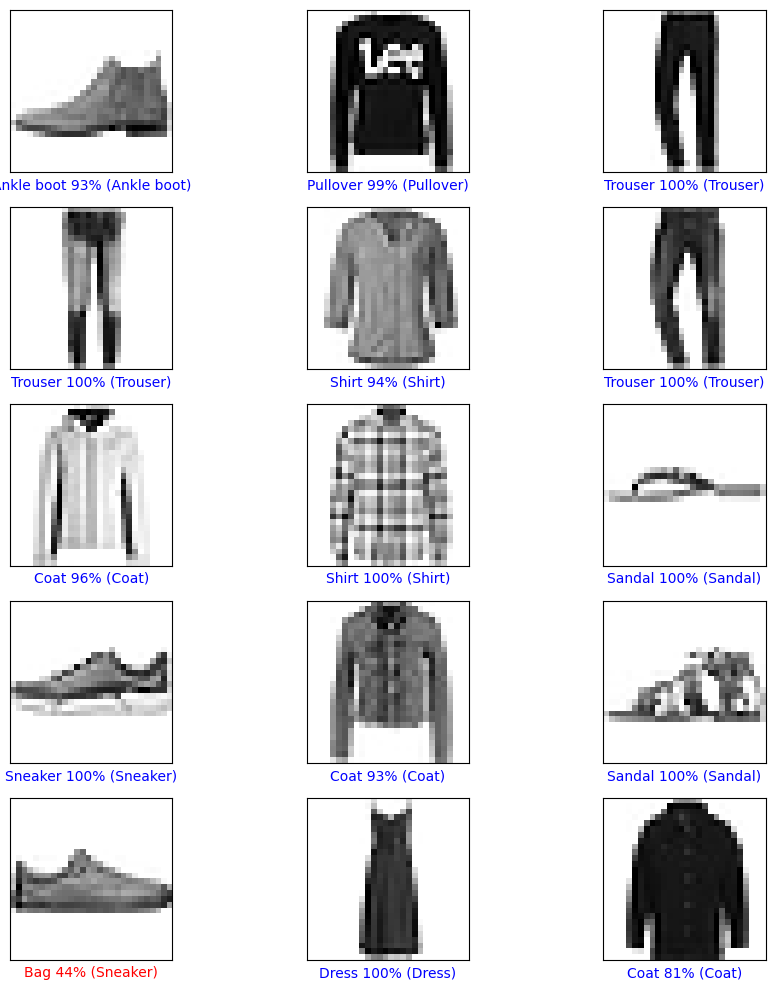

In [153]:
# Let us plot the predictions, red means incorrect while blue means correct prediction.
rows = 5
cols = 3
total_images = rows * cols
plt.figure(figsize = (10, 10))
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()